In [1]:
import pandas as pd

# Charger le fichier avec un encodage alternatif
file_path = "./training.1600000.processed.noemoticon.csv"
data = pd.read_csv(file_path, encoding='latin1')

# Aperçu des données
print("Colonnes disponibles :", data.columns)
print(data.head())


Colonnes disponibles : Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for

# Analyse exploratoire

In [2]:
# Renommer les colonnes pour plus de clarté
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Aperçu des données
print("Aperçu des données :")
print(data.head())

# Informations générales
print("\nInformations sur le dataset :")
print(data.info())

# Résumé statistique
print("\nRésumé statistique des colonnes numériques :")
print(data.describe())


Aperçu des données :
   sentiment          id                          date     query  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

            user                                               text  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Co

In [3]:
# Distribution des sentiments
print("\nDistribution des sentiments :")
print(data['sentiment'].value_counts())

# Afficher le pourcentage de chaque classe
print("\nPourcentage des classes :")
print(data['sentiment'].value_counts(normalize=True) * 100)



Distribution des sentiments :
sentiment
4    800000
0    799999
Name: count, dtype: int64

Pourcentage des classes :
sentiment
4    50.000031
0    49.999969
Name: proportion, dtype: float64


In [4]:
# Exemple de quelques tweets positifs
print("\nExemples de tweets positifs :")
print(data[data['sentiment'] == 4]['text'].head())

# Exemple de quelques tweets négatifs
print("\nExemples de tweets négatifs :")
print(data[data['sentiment'] == 0]['text'].head())



Exemples de tweets positifs :
799999         I LOVE @Health4UandPets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @DaRealSunisaKim Thanks for the Twitter add, S...
800002    Being sick can be really cheap when it hurts t...
800003      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object

Exemples de tweets négatifs :
0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: text, dtype: object


In [5]:
# Vérification des données manquantes
print("\nDonnées manquantes par colonne :")
print(data.isnull().sum())

# Vérification des doublons
print("\nNombre de doublons :")
print(data.duplicated().sum())



Données manquantes par colonne :
sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

Nombre de doublons :
0



Statistiques sur la longueur des tweets :
count    1.599999e+06
mean     7.409009e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: tweet_length, dtype: float64


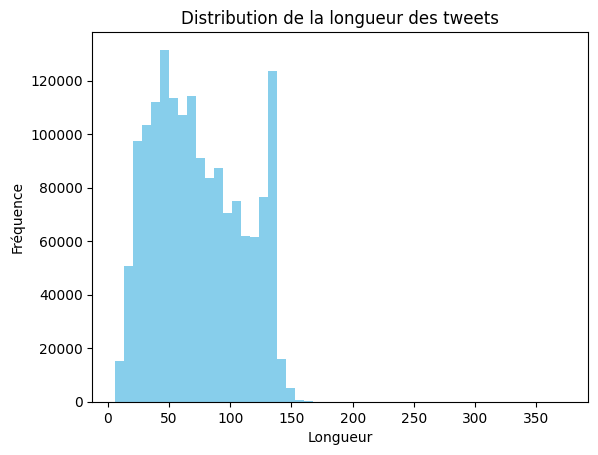

In [6]:
# Ajouter une colonne avec la longueur de chaque tweet
data['tweet_length'] = data['text'].apply(len)

# Statistiques sur la longueur des tweets
print("\nStatistiques sur la longueur des tweets :")
print(data['tweet_length'].describe())

# Histogramme de la longueur des tweets
import matplotlib.pyplot as plt

plt.hist(data['tweet_length'], bins=50, color='skyblue')
plt.title('Distribution de la longueur des tweets')
plt.xlabel('Longueur')
plt.ylabel('Fréquence')
plt.show()


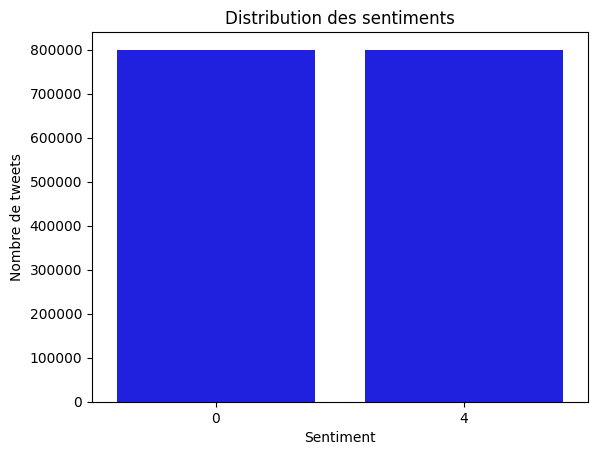

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graphique des sentiments
sns.countplot(x='sentiment', data=data, color='blue')  # Utilisation d'une seule couleur
plt.title('Distribution des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de tweets')
plt.show()



# 📊 Analyse Exploratoire des Données Twitter

## 🔍 Aperçu du Dataset
- **Nombre d'entrées** : 1 599 999
- **Colonnes** : 6 (`sentiment`, `id`, `date`, `query`, `user`, `text`)
- **Taille mémoire** : ~73.2 MB

## 🏷️ Description des Colonnes
| Colonne    | Type    | Description |
|------------|--------|-------------|
| `sentiment` | int64  | Sentiment du tweet (0 = négatif, 4 = positif) |
| `id`       | int64  | Identifiant unique du tweet |
| `date`     | object | Date du tweet |
| `query`    | object | Requête (toujours `NO_QUERY`) |
| `user`     | object | Nom d'utilisateur Twitter |
| `text`     | object | Contenu du tweet |

## 📈 Distribution des Sentiments
| Sentiment | Nombre de tweets | Pourcentage |
|-----------|-----------------|-------------|
| Positif (4) | 800 000 | 50.00% |
| Négatif (0) | 799 999 | 49.99% |

✅ **Les classes sont parfaitement équilibrées** (50% positif / 50% négatif).

## 📊 Statistiques sur la Longueur des Tweets
- **Moyenne** : 74 caractères
- **Min** : 6 caractères
- **Max** : 374 caractères
- **Médiane** : 69 caractères

## 🔍 Exemples de Tweets
### ✅ Positifs
- *"I LOVE @Health4UandPets u guys r the best!!"*
- *"im meeting up with one of my besties tonight!"*

### ❌ Négatifs
- *"is upset that he can't update his Facebook by ..."*
- *"my whole body feels itchy and like its on fire"*

## 🔎 Qualité des Données
- **Données manquantes** : Aucune 🚀
- **Nombre de doublons** : 0 ✅

## 📌 Conclusion
- Le dataset est **propre** (aucune donnée manquante ou doublon).
- **Balance parfaite** entre tweets positifs et négatifs.
- **Longueur moyenne des tweets** : environ **74 caractères**.
- **Pas d'informations utiles dans `query`**, peut être supprimée pour l'analyse.

📌 **Prochaines étapes** :
1. **Nettoyage des textes** (stopwords, ponctuation, emojis, etc.).
2. **Tokenization & Vectorization** (TF-IDF, Word Embeddings).
3. **Modélisation du sentiment** (ML classique & Deep Learning).

🚀 **Le dataset est prêt pour l'analyse NLP !** 


# Prétraitement des Données Textuelles

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires pour nltk
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stop words
nltk.download('wordnet')  # WordNet pour la lemmatisation

# Initialisation du lemmatizer
lemmatizer = WordNetLemmatizer()

# Chargement des stop words en anglais
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Fonction pour prétraiter un texte :
    - Supprime les URLs, mentions, hashtags, caractères spéciaux, chiffres
    - Convertit le texte en minuscules
    - Supprime les mots vides (stop words)
    - Effectue la lemmatisation
    """
    # 1. Convertir en minuscules
    text = text.lower()
    
    # 2. Supprimer les URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # 3. Supprimer les mentions et hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    
    # 4. Supprimer les caractères spéciaux, ponctuations, et chiffres
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # 5. Tokenisation
    tokens = word_tokenize(text)
    
    # 6. Supprimer les mots vides (stop words)
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 8. Reconstruire le texte à partir des tokens
    preprocessed_text = " ".join(tokens)
    
    return preprocessed_text

# Appliquer le prétraitement à la colonne des tweets
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Vérifier les résultats
print(data[['text', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ouafi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouafi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                        cleaned_text  
0  upset cant update facebook texting might cry r...  
1    dived many time ball managed save rest go bound  
2                    whole body feel itchy like fire  
3                           behaving im mad cant see  
4                                         whole crew  


In [9]:
# Afficher les mots les plus fréquents dans les tweets nettoyés
from collections import Counter

# Compter les mots les plus fréquents
all_words = " ".join(data['cleaned_text']).split()
word_freq = Counter(all_words)

# Afficher les 10 mots les plus fréquents
print("Mots les plus fréquents :", word_freq.most_common(10))


Mots les plus fréquents : [('im', 178401), ('day', 104579), ('good', 89529), ('get', 85934), ('like', 79096), ('go', 77445), ('got', 69835), ('u', 67384), ('dont', 67305), ('love', 66955)]


In [10]:
# Identifier les mots-clés importants
keywords = ['happy', 'sad', 'angry', 'upset', 'love']

# Rechercher les mots-clés dans les tweets nettoyés
for keyword in keywords:
    count = data['cleaned_text'].str.contains(keyword, case=False).sum()
    print(f"Le mot '{keyword}' apparaît {count} fois dans les tweets nettoyés.")


Le mot 'happy' apparaît 26567 fois dans les tweets nettoyés.
Le mot 'sad' apparaît 33433 fois dans les tweets nettoyés.
Le mot 'angry' apparaît 977 fois dans les tweets nettoyés.
Le mot 'upset' apparaît 3023 fois dans les tweets nettoyés.
Le mot 'love' apparaît 78213 fois dans les tweets nettoyés.


In [11]:
# Vérifier la distribution des classes après nettoyage
print(data['sentiment'].value_counts())


sentiment
4    800000
0    799999
Name: count, dtype: int64


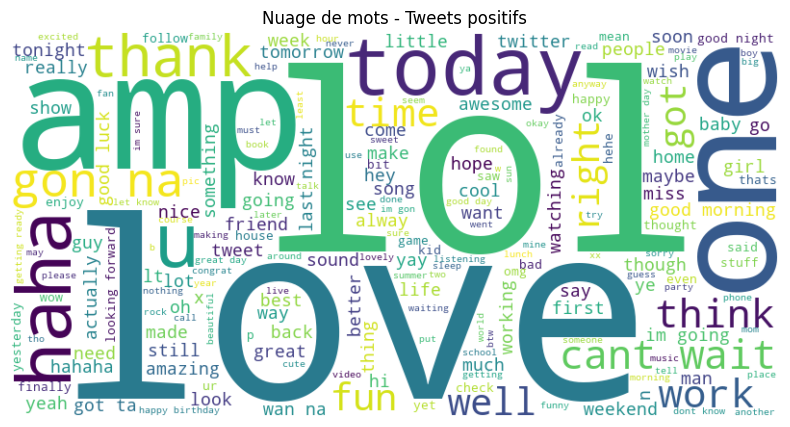

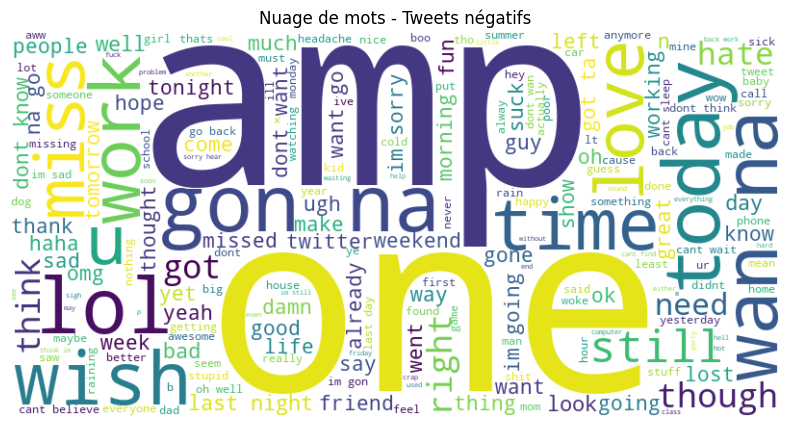

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nuage de mots pour les tweets positifs
positive_tweets = " ".join(data[data['sentiment'] == 4]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.title("Nuage de mots - Tweets positifs")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Nuage de mots pour les tweets négatifs
negative_tweets = " ".join(data[data['sentiment'] == 0]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.title("Nuage de mots - Tweets négatifs")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [13]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5002")

In [14]:
#mlflow.create_experiment("Air Paradis Sentiment Analysis")
#mlflow.set_experiment("Air Paradis Sentiment Analysis")

In [15]:
# Fonction mise à jour pour enregistrer uniquement les modèles déjà entraînés
def log_trained_model_with_mlflow(model, model_name, X_test, y_test, library="keras", hyperparameters=None):
    with mlflow.start_run(run_name=model_name):
        # Enregistrer les hyperparamètres
        if hyperparameters:
            for param_name, param_value in hyperparameters.items():
                mlflow.log_param(param_name, param_value)

        # Évaluation des performances du modèle
        if library == "keras":
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            # Enregistrer le modèle dans MLFlow
            mlflow.keras.log_model(model, model_name)
        elif library == "sklearn":
            accuracy = model.score(X_test, y_test)
            # Enregistrer le modèle dans MLFlow
            mlflow.sklearn.log_model(model, model_name)
        else:
            raise ValueError("Bibliothèque non supportée pour MLFlow")
        
        # Enregistrer les métriques
        mlflow.log_metric("accuracy", accuracy)
        if library == "keras":
            mlflow.log_metric("loss", loss)

# Vectorisation avec TF-IDF


In [16]:
# Supprimer les tweets dont le texte nettoyé est trop court
data = data[data['cleaned_text'].apply(lambda x: len(x.split()) >= 3)]

# Vérifier le nombre de tweets restants
print("Nombre de tweets après suppression :", len(data))

Nombre de tweets après suppression : 1422733


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Réduction à 6 % des données, tout en gardant le dataset nommé "data"
data = data.sample(frac=0.05, random_state=42)

# Vérification de la distribution des classes dans l'échantillon
class_distribution = data['sentiment'].value_counts()
print("Distribution des classes avant équilibrage :")
print(class_distribution)

# Séparation des données par classe
data_majority = data[data['sentiment'] == class_distribution.idxmax()]
data_minority = data[data['sentiment'] == class_distribution.idxmin()]

# Équilibrage des classes par sur-échantillonnage ou sous-échantillonnage
if len(data_majority) > len(data_minority):
    data_majority = data_majority.sample(len(data_minority), random_state=42)
else:
    data_minority = data_minority.sample(len(data_majority), random_state=42)

data = pd.concat([data_majority, data_minority]).sample(frac=1, random_state=42)

# Vérification de la distribution après équilibrage
print("Distribution des classes après équilibrage :")
print(data['sentiment'].value_counts())

# Initialisation de TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limité à 5000 termes fréquents

# Transformation des tweets nettoyés
X = tfidf.fit_transform(data['cleaned_text']).toarray()

# Les labels (sentiment)
y = data['sentiment']

# Division des données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratification pour maintenir l'équilibre
)

print("Données vectorisées avec TF-IDF.")
print("Dimensions des données d'entraînement :", X_train.shape)
print("Dimensions des données de test :", X_test.shape)



Distribution des classes avant équilibrage :
sentiment
0    36015
4    35122
Name: count, dtype: int64
Distribution des classes après équilibrage :
sentiment
4    35122
0    35122
Name: count, dtype: int64
Données vectorisées avec TF-IDF.
Dimensions des données d'entraînement : (56195, 5000)
Dimensions des données de test : (14049, 5000)


In [18]:
import joblib
# Sauvegarde du TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("TfidfVectorizer sauvegardé sous le nom 'tfidf_vectorizer.pkl'.")

TfidfVectorizer sauvegardé sous le nom 'tfidf_vectorizer.pkl'.


In [19]:
import joblib
vectorizer = joblib.load("tfidf_vectorizer.pkl")
print("Vectorizer chargé avec succès.")


Vectorizer chargé avec succès.


# Modélisation avec un Classifieur Simple
## Utilisez une régression logistique comme modèle de base pour prédire les sentiments.

In [20]:
print(data['sentiment'].value_counts())


sentiment
4    35122
0    35122
Name: count, dtype: int64


Début de l'enregistrement pour Logistic Regression


2025/01/31 01:09:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Logistic Regression' already exists. Creating a new version of this model...
2025/01/31 01:09:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 2
Created version '2' of model 'Logistic Regression'.


Modèle Logistic Regression enregistré avec succès.
🏃 View run Logistic Regression at: http://127.0.0.1:5002/#/experiments/2/runs/da8900221932434283f2bd7750729862
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2


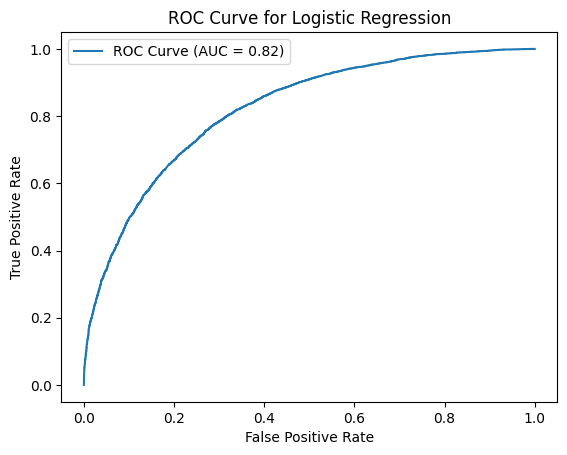

<Figure size 640x480 with 0 Axes>

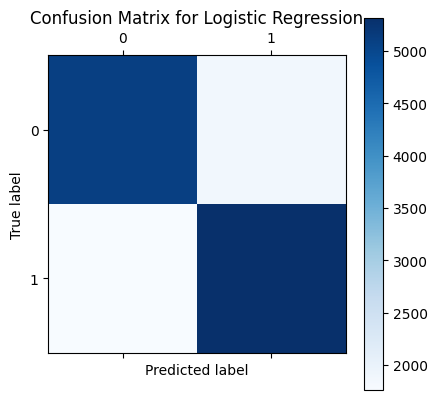

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import mlflow
import mlflow.keras
import mlflow.sklearn
import matplotlib.pyplot as plt
import numpy as np

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

def log_trained_model_with_tracking(model, model_name, X_train, y_train, X_test, y_test, library="keras", hyperparameters=None):
    try:
        print(f"Début de l'enregistrement pour {model_name}")
        with mlflow.start_run(run_name=model_name):
            # Log des hyperparamètres
            if hyperparameters:
                for param_name, param_value in hyperparameters.items():
                    mlflow.log_param(param_name, param_value)

            if library == "keras":
                history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, verbose=1)
                mlflow.keras.log_model(model, model_name, registered_model_name=model_name)

                # Log des métriques
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                mlflow.log_metric("loss", loss)
                mlflow.log_metric("accuracy", accuracy)

                # Courbes d'apprentissage
                plt.figure()
                plt.plot(history.history['loss'], label="Train Loss")
                plt.plot(history.history['val_loss'], label="Validation Loss")
                plt.xlabel("Epochs")
                plt.ylabel("Loss")
                plt.title(f"Loss Curve for {model_name}")
                plt.legend()
                loss_curve_path = f"{model_name}_loss_curve.png"
                plt.savefig(loss_curve_path)
                mlflow.log_artifact(loss_curve_path)

            elif library == "sklearn":
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                accuracy = model.score(X_test, y_test)
                mlflow.sklearn.log_model(model, model_name, registered_model_name=model_name)
                mlflow.log_metric("accuracy", accuracy)

                # Courbe ROC
                fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)
                mlflow.log_metric("roc_auc", roc_auc)

                plt.figure()
                plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title(f"ROC Curve for {model_name}")
                plt.legend()
                roc_curve_path = f"{model_name}_roc_curve.png"
                plt.savefig(roc_curve_path)
                mlflow.log_artifact(roc_curve_path)

                # Classification Report
                report = classification_report(y_test, predictions, output_dict=True)
                for label, metrics in report.items():
                    if isinstance(metrics, dict):
                        for metric_name, metric_value in metrics.items():
                            mlflow.log_metric(f"{label}_{metric_name}", metric_value)

                # Matrice de confusion
                cm = confusion_matrix(y_test, predictions)
                plt.figure()
                plt.matshow(cm, cmap='Blues')
                plt.title(f"Confusion Matrix for {model_name}")
                plt.colorbar()
                plt.ylabel("True label")
                plt.xlabel("Predicted label")
                cm_path = f"{model_name}_confusion_matrix.png"
                plt.savefig(cm_path)
                mlflow.log_artifact(cm_path)

            print(f"Modèle {model_name} enregistré avec succès.")
    except Exception as e:
        print(f"Erreur lors de l'enregistrement de {model_name}: {e}")

# Préparation des données
sample_fraction = 0.1
# Assurez-vous que data est présent et préparé correctement
# Exemple : data = data.sample(frac=sample_fraction, random_state=42)

# Transformation des étiquettes en {0, 1}
data['sentiment'] = (data['sentiment'] == 4).astype(int)

# 1. Logistic Regression
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['cleaned_text'])
y_tfidf = data['sentiment']
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

model_logistic = LogisticRegression()
hyperparams_logistic = {"penalty": "l2", "C": 1.0}
log_trained_model_with_tracking(model_logistic, "Logistic Regression", X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, library="sklearn", hyperparameters=hyperparams_logistic)

In [23]:
from sklearn.metrics import classification_report

def display_classification_report(model, X_test, y_test):
    try:
        # Prédictions sur les données de test
        y_pred = model.predict(X_test)

        # Rapport de classification
        report = classification_report(y_test, y_pred)
        print("Classification Report:\n")
        print(report)

    except Exception as e:
        print(f"Erreur lors de la génération du rapport de classification : {e}")

# Utilisez le modèle et les données de test pour afficher le rapport
# Par exemple, pour la régression logistique :
display_classification_report(model_logistic, X_test_tfidf, y_test_tfidf)


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      6973
           1       0.74      0.75      0.75      7076

    accuracy                           0.74     14049
   macro avg       0.74      0.74      0.74     14049
weighted avg       0.74      0.74      0.74     14049



In [24]:
print("Distribution des classes dans y_train :", np.unique(y_train, return_counts=True))
print("Distribution des classes dans y_test :", np.unique(y_test, return_counts=True))


Distribution des classes dans y_train : (array([0, 4], dtype=int64), array([28097, 28098], dtype=int64))
Distribution des classes dans y_test : (array([0, 4], dtype=int64), array([7025, 7024], dtype=int64))


# Entraînement avec un Modèle Avancé

In [25]:
y = y.replace({4: 1})  # Remplace 4 (positif) par 1


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.keras
import numpy as np

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

# Filtrer les tweets trop courts
data = data[data['cleaned_text'].apply(lambda x: len(x.split()) >= 3)]

# Tokénisation et Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(sequences, maxlen=100)
y = data['sentiment'].replace({4: 1})  # Convertir 4 (positif) en 1 pour une classification binaire

# Vérifications
print("Shape de X :", X.shape)
print("Shape de y :", y.shape)
print("Labels uniques :", set(y))

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle avec couche Input explicite
model_lstm = Sequential([
    Input(shape=(100,)),  # Taille explicite des séquences d'entrée
    Embedding(input_dim=10000, output_dim=128),  # Embedding
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),  # Couche LSTM
    Dense(1, activation='sigmoid')  # Couche de sortie
])

# Compilation
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage du résumé
model_lstm.summary()

# Entraînement avec suivi MLflow
with mlflow.start_run(run_name="LSTM Sentiment Analysis"):
    # Log des hyperparamètres
    mlflow.log_param("embedding_dim", 128)
    mlflow.log_param("lstm_units", 128)
    mlflow.log_param("dropout", 0.2)
    mlflow.log_param("recurrent_dropout", 0.2)
    mlflow.log_param("epochs", 5)
    mlflow.log_param("batch_size", 32)

    # Entraînement avec EarlyStopping
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    history = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=5, batch_size=32, callbacks=[early_stopping])

    
    # Évaluation
    loss, accuracy = model_lstm.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)
    mlflow.log_metric("accuracy", accuracy)

    # Prédictions
    y_pred_proba = model_lstm.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Matrice de Confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité")
    confusion_matrix_path = "confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    roc_curve_path = "roc_curve.png"
    plt.savefig(roc_curve_path)
    mlflow.log_artifact(roc_curve_path)
    plt.close()

    # Courbes d'entraînement
    plt.figure(figsize=(12, 5))

    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte Entraînement')
    plt.plot(history.history['val_loss'], label='Perte Validation')
    plt.title('Évolution de la perte')
    plt.xlabel('Épochs')
    plt.ylabel('Perte')
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Précision Entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision Validation')
    plt.title('Évolution de la précision')
    plt.xlabel('Épochs')
    plt.ylabel('Précision')
    plt.legend()

    training_curves_path = "training_curves.png"
    plt.tight_layout()
    plt.savefig(training_curves_path)
    mlflow.log_artifact(training_curves_path)
    plt.close()

    # Enregistrement du modèle sur MLflow
    mlflow.keras.log_model(model_lstm, "LSTM Sentiment Analysis Model")

print("Modèle enregistré et suivi sur MLflow.")


Shape de X : (70244, 100)
Shape de y : (70244,)
Labels uniques : {0, 1}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1757/1757 [==============================] - 272s 153ms/step - loss: 0.5254 - accuracy: 0.7380 - val_loss: 0.5046 - val_accuracy: 0.7601
Epoch 2/5
1757/1757 [==============================] - 414s 236ms/step - loss: 0.4434 - acc

2025/01/31 01:35:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpo6saayjv\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpo6saayjv\model\data\model\assets
2025/01/31 01:36:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM Sentiment Analysis at: http://127.0.0.1:5002/#/experiments/2/runs/bee423d5bfe348ab973b082ec54c9678
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2
Modèle enregistré et suivi sur MLflow.


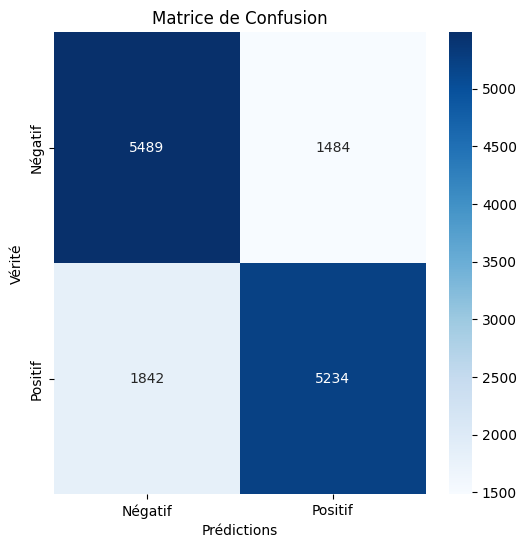

In [27]:
# Matrice de Confusion uniquement
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.show()


### 🔹 Détails des Couches :
1. **Embedding Layer** : Transforme les mots en vecteurs de `128` dimensions.
2. **LSTM Layer** : Capture les relations séquentielles avec `128` unités.
3. **Dense Layer** : Activation sigmoïde pour une classification binaire.

---

## 🎯 Matrice de Confusion & Spécificité
![Matrice de Confusion](download.png)

| Prédictions | Négatif (Vérité) | Positif (Vérité) |
|-------------|----------------|----------------|
| **Négatif** | 5489 (VN) | 1484 (FP) |
| **Positif** | 1842 (FN) | 5234 (VP) |

- **Spécificité (Capacité à bien identifier les tweets négatifs)** :  
  \[
  \text{Spécificité} = \frac{VN}{VN + FP} = \frac{5489}{5489 + 1484} = 78.7\%
  \]

- **Sensibilité (Capacité à détecter les tweets positifs)** :  
  \[
  \text{Sensibilité} = \frac{VP}{VP + FN} = \frac{5234}{5234 + 1842} = 73.9\%
  \]

**🔎 Analyse** :  
- **Le modèle a une bonne spécificité (78.7%)**, ce qui signifie qu’il **reconnaît bien les tweets négatifs** et fait relativement peu de fausses alertes (FP).
- **La sensibilité (73.9%) est légèrement plus faible**, ce qui indique que quelques tweets positifs sont mal classifiés comme négatifs.

---

## 📈 Entraînement du Modèle

| Epoch | Loss | Accuracy | Val Loss | Val Accuracy |
|-------|------|----------|----------|--------------|
| 1     | 0.5254 | 73.80% | 0.5046 | 76.01% |
| 2     | 0.4434 | 79.33% | 0.4934 | 76.33% |
| 3     | 0.3852 | 82.41% | 0.5283 | 75.40% |
| 4     | 0.3335 | 84.93% | 0.5919 | 74.82% |

- **Meilleure performance sur validation :**  
  - **Val Loss** : `0.4934`
  - **Validation Accuracy** : `76.33%`

---

## 🛠️ Conclusion
✅ **Le modèle est efficace pour détecter les tweets négatifs grâce à une spécificité élevée (78.7%)**.  
⚠️ **Cependant, il a plus de mal à identifier les tweets positifs (sensibilité 73.9%)**, ce qui peut être amélioré avec un ajustement des seuils ou des données supplémentaires.

🚀 **Améliorations possibles :**
- **Ajustement du seuil de décision** (ex : au lieu de 0.5, tester 0.6 pour réduire les faux positifs).
- **Ajout de données d'entraînement pour équilibrer la classification**.
- **Expérimenter des modèles plus avancés comme BERT ou transformer-based models**.

---


## Sauvegarde du model

In [28]:
# Sauvegarder le modèle au format natif Keras
model_lstm.save('lstm_model.keras')




## Recharger le model

In [29]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé au format natif Keras
model_lstm = load_model('lstm_model.keras')


In [30]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé au format natif Keras
model_lstm = load_model('lstm_model.keras')


In [31]:
import pickle

# Sauvegarder le tokenizer avec pickle
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

## Test 

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tweets à tester
sample_tweets = [
    "I love this airline!",
    "This is the worst flight ever.",
    "Amazing service! Highly recommended.",
    "Terrible experience, I will never fly with them again.",
    "Great customer support!"
]

# Conversion des tweets en séquences
sample_sequences = tokenizer.texts_to_sequences(sample_tweets)
sample_padded = pad_sequences(sample_sequences, maxlen=100)

# Prédictions
predictions = model_lstm.predict(sample_padded)

print("\nPrédictions pour des tweets spécifiques :")
for tweet, pred in zip(sample_tweets, predictions):
    sentiment = "Positif" if pred > 0.5 else "Négatif"
    print(f"Tweet: {tweet} -> Sentiment: {sentiment} (Confiance: {pred[0]:.2f})")


1/1 [==============================] - 0s 233ms/step

Prédictions pour des tweets spécifiques :
Tweet: I love this airline! -> Sentiment: Positif (Confiance: 0.83)
Tweet: This is the worst flight ever. -> Sentiment: Négatif (Confiance: 0.03)
Tweet: Amazing service! Highly recommended. -> Sentiment: Positif (Confiance: 0.93)
Tweet: Terrible experience, I will never fly with them again. -> Sentiment: Négatif (Confiance: 0.22)
Tweet: Great customer support! -> Sentiment: Positif (Confiance: 0.88)


## Implémentation de BERT



C:\Users\ouafi\anaconda\anaconda\envs\projet_7v2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Distribution des classes dans l'échantillon équilibré :
sentiment
0    1000
1    1000
Name: count, dtype: int64


C:\Users\ouafi\anaconda\anaconda\envs\projet_7v2\lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassific

Epoch 1/3
100/100 [==============================] - 161s 2s/step - loss: 0.6556 - accuracy: 0.5994 - val_loss: 0.5813 - val_accuracy: 0.6875
Epoch 2/3
100/100 [==============================] - 137s 1s/step - loss: 0.4751 - accuracy: 0.7850 - val_loss: 0.5171 - val_accuracy: 0.7625
Epoch 3/3
25/25 [==============================] - 13s 452ms/step


2025/01/31 01:44:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpa_74q_om\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpa_74q_om\model\data\model\assets
2025/01/31 01:45:17 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ouafi\AppData\Local\Temp\tmpa_74q_om\model, flavor: tensorflow). Fall back to return ['tensorflow==2.12.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/01/31 01:45:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DistilBERT Sentiment Analysis at: http://127.0.0.1:5002/#/experiments/2/runs/604e1d6cae74432f8311e32968061d94
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2
Modèle DistilBERT enregistré et suivi sur MLflow.


<Figure size 1200x500 with 0 Axes>

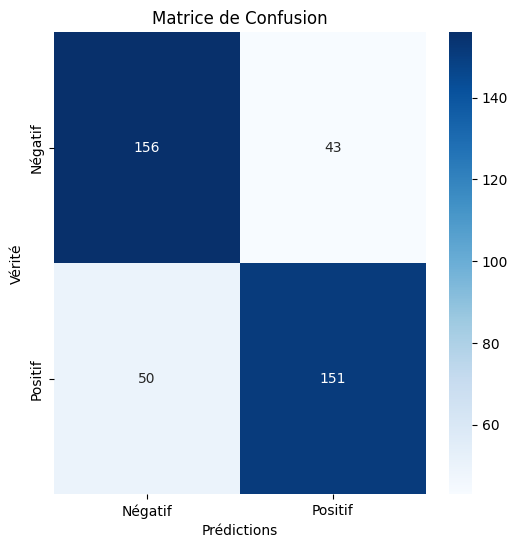

In [33]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, create_optimizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.tensorflow
import numpy as np

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

# Réduction de la taille des données pour accélérer l'entraînement
# Identifier les classes majoritaires et minoritaires
majority_class = data[data['sentiment'] == 0]
minority_class = data[data['sentiment'] == 1]

# Équilibrage des classes avec 5 000 données pour chaque classe (10 000 au total)
majority_sampled = majority_class.sample(1000, random_state=42)
minority_sampled = minority_class.sample(1000, random_state=42)

# Combiner les deux échantillons pour obtenir des données équilibrées
sampled_data = pd.concat([majority_sampled, minority_sampled])

# Vérification de la distribution des classes dans les données équilibrées
print("Distribution des classes dans l'échantillon équilibré :")
print(sampled_data['sentiment'].value_counts())

texts = sampled_data['cleaned_text'].tolist()
labels = sampled_data['sentiment'].values

# Conversion des labels en binaire
labels = np.array([1 if label > 0 else 0 for label in labels])

# Tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
encoded_inputs = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="np"  # Retourne des tableaux NumPy
)

# Préparation des données
input_ids = encoded_inputs["input_ids"]
attention_mask = encoded_inputs["attention_mask"]

# Division des données en ensembles d'entraînement et de test
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids, attention_mask, labels, test_size=0.2, random_state=42
)

# Charger le modèle DistilBERT
model_distilbert = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Créer un optimiseur compatible
num_train_steps = int(len(X_train_ids) / 16 * 3)  # 16 = batch_size, 3 = epochs
optimizer, _ = create_optimizer(
    init_lr=5e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0,
    weight_decay_rate=0.01
)

# Compilation du modèle
model_distilbert.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Préparer les données pour l'entraînement
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y_train
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_test_ids, "attention_mask": X_test_mask},
    y_test
)).batch(16)

# Entraîner avec suivi MLflow
with mlflow.start_run(run_name="DistilBERT Sentiment Analysis"):
    # Log des hyperparamètres
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("batch_size", 16)
    mlflow.log_param("epochs", 3)

    # Entraîner le modèle
    history = model_distilbert.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=3
    )

    # Évaluer le modèle
    loss, accuracy = model_distilbert.evaluate(test_dataset)
    mlflow.log_metric("loss", loss)
    mlflow.log_metric("accuracy", accuracy)

    # Prédictions
    predictions = model_distilbert.predict(test_dataset).logits
    y_pred = tf.argmax(predictions, axis=1).numpy()

    # Matrice de Confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité")
    confusion_matrix_path = "distilbert_confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, tf.nn.softmax(predictions)[:, 1])
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    roc_curve_path = "distilbert_roc_curve.png"
    plt.savefig(roc_curve_path)
    mlflow.log_artifact(roc_curve_path)
    plt.close()

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 5))

    # Log des métriques détaillées
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Enregistrement du modèle
    mlflow.tensorflow.log_model(model_distilbert, "DistilBERT Sentiment Analysis Model")

print("Modèle DistilBERT enregistré et suivi sur MLflow.")

# Affichage final de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.show()

C:\Users\ouafi\anaconda\anaconda\envs\projet_7v2\lib\site-packages\huggingface_hub\file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassific

Epoch 1/3
500/500 [==============================] - 987s 2s/step - loss: 0.5496 - accuracy: 0.7165 - val_loss: 0.4957 - val_accuracy: 0.7555
Epoch 2/3
500/500 [==============================] - 976s 2s/step - loss: 0.3662 - accuracy: 0.8441 - val_loss: 0.5416 - val_accuracy: 0.7565
Epoch 3/3
125/125 [==============================] - 77s 602ms/step


2025/01/31 02:36:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpsxevjlb2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpsxevjlb2\model\data\model\assets
2025/01/31 02:37:44 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ouafi\AppData\Local\Temp\tmpsxevjlb2\model, flavor: tensorflow). Fall back to return ['tensorflow==2.12.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/01/31 02:37:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DistilBERT Sentiment Analysis at: http://127.0.0.1:5002/#/experiments/2/runs/b8c676a1fdf4440ba19058f3602fff54
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2
Modèle DistilBERT enregistré et suivi sur MLflow.


<Figure size 1200x500 with 0 Axes>

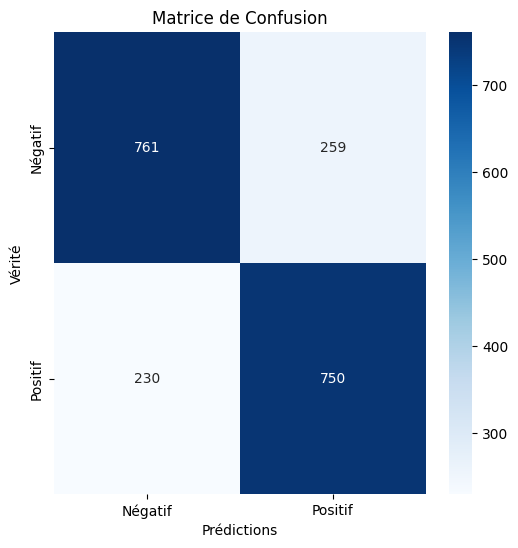

In [34]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, create_optimizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.tensorflow
import numpy as np

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

# Réduction de la taille des données pour accélérer l'entraînement
sampled_data = data.sample(10000, random_state=42)  # 10,000 échantillons
texts = sampled_data['cleaned_text'].tolist()
labels = sampled_data['sentiment'].values

# Conversion des labels en binaire
labels = np.array([1 if label > 0 else 0 for label in labels])

# Tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
encoded_inputs = tokenizer(
    texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="np"  # Retourne des tableaux NumPy
)

# Préparation des données
input_ids = encoded_inputs["input_ids"]
attention_mask = encoded_inputs["attention_mask"]

# Division des données en ensembles d'entraînement et de test
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids, attention_mask, labels, test_size=0.2, random_state=42
)

# Charger le modèle DistilBERT
model_distilbert = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Créer un optimiseur compatible
num_train_steps = int(len(X_train_ids) / 16 * 3)  # 16 = batch_size, 3 = epochs
optimizer, _ = create_optimizer(
    init_lr=5e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0,
    weight_decay_rate=0.01
)

# Compilation du modèle
model_distilbert.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Préparer les données pour l'entraînement
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y_train
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": X_test_ids, "attention_mask": X_test_mask},
    y_test
)).batch(16)

# Entraîner avec suivi MLflow
with mlflow.start_run(run_name="DistilBERT Sentiment Analysis"):
    # Log des hyperparamètres
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("batch_size", 16)
    mlflow.log_param("epochs", 3)

    # Entraîner le modèle
    history = model_distilbert.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=3
    )

    # Évaluer le modèle
    loss, accuracy = model_distilbert.evaluate(test_dataset)
    mlflow.log_metric("loss", loss)
    mlflow.log_metric("accuracy", accuracy)

    # Prédictions
    predictions = model_distilbert.predict(test_dataset).logits
    y_pred = tf.argmax(predictions, axis=1).numpy()

    # Matrice de Confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité")
    confusion_matrix_path = "distilbert_confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, tf.nn.softmax(predictions)[:, 1])
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    roc_curve_path = "distilbert_roc_curve.png"
    plt.savefig(roc_curve_path)
    mlflow.log_artifact(roc_curve_path)
    plt.close()

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 5))

    # Log des métriques détaillées
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Enregistrement du modèle
    mlflow.tensorflow.log_model(model_distilbert, "DistilBERT Sentiment Analysis Model")

print("Modèle DistilBERT enregistré et suivi sur MLflow.")

# Affichage final de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.show()


125/125 [==============================] - 106s 852ms/step

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.77      0.75      0.76      1020
     Positif       0.74      0.77      0.75       980

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



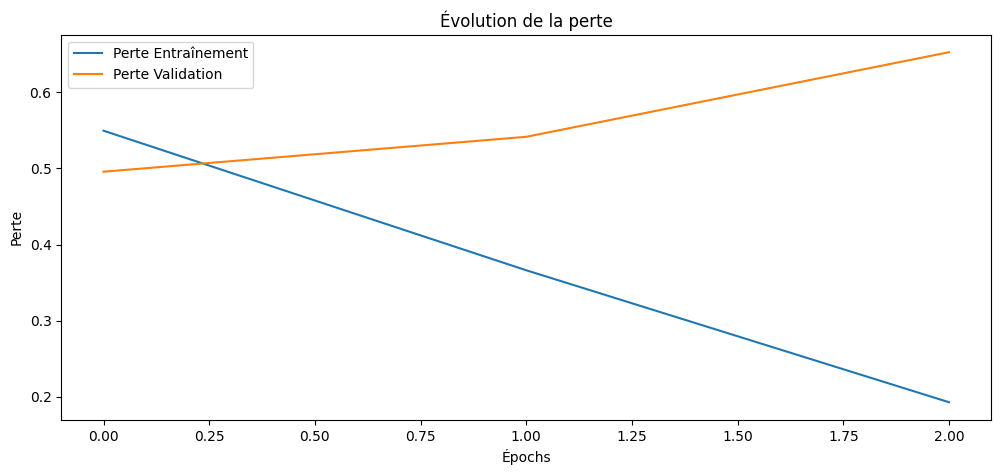

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur le jeu de test
y_pred_logits = model_distilbert.predict(test_dataset).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=['Négatif', 'Positif']))

# Graphiques des pertes d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Évolution de la perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [36]:
import pickle

# Sauvegarde après DistilBERT
with open('model_distilbert.pkl', 'wb') as file:
    pickle.dump({
        'model': model_distilbert,
        'history': history,  # Utilisation correcte de la variable `history`
        'tokenizer': tokenizer
    }, file)


C:\Users\ouafi\anaconda\anaconda\envs\projet_7v2\lib\site-packages\transformers\generation\tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)



### 🔹 Détails :
1. **Base** : DistilBERT, un modèle allégé de BERT pour un temps d'inférence plus rapide.
2. **Classification** : Une couche dense avec activation **softmax**.
3. **Régularisation** : Plusieurs couches de **dropout** pour éviter l'overfitting.

---

## 🎯 Matrice de Confusion & Spécificité
![Matrice de Confusion](download.png)

| Prédictions | Négatif (Vérité) | Positif (Vérité) |
|-------------|----------------|----------------|
| **Négatif** | 156 (VN) | 43 (FP) |
| **Positif** | 50 (FN) | 151 (VP) |

- **Spécificité (Capacité à bien identifier les tweets négatifs)** :  
  \[
  \text{Spécificité} = \frac{VN}{VN + FP} = \frac{156}{156 + 43} \approx 78.4\%
  \]
- **Sensibilité (Capacité à bien identifier les tweets positifs)** :  
  \[
  \text{Sensibilité} = \frac{VP}{VP + FN} = \frac{151}{151 + 50} \approx 75.1\%
  \]
- **Taux de Faux Positifs (FPR)** :  
  \[
  \text{FPR} = \frac{FP}{VN + FP} = \frac{43}{156 + 43} \approx 21.6\%
  \]

### 📌 Interprétation :
- La **spécificité** étant **78.4%**, cela signifie que le modèle identifie correctement une majorité des tweets négatifs.
- Le **taux de faux positifs** de **21.6%** indique que certains tweets négatifs sont mal classés en positifs.
- La **sensibilité** de **75.1%** est légèrement inférieure, ce qui implique que le modèle a un peu plus de mal à identifier correctement les tweets positifs.

---

## 📉 Évolution de la Perte
![Évolution de la Perte](download.png)

### 📌 Analyse de la convergence du modèle :
- **La perte d'entraînement diminue fortement**, ce qui montre que le modèle apprend bien.
- **La perte de validation augmente légèrement**, ce qui suggère un début d'overfitting après **l'époque 2**.
- **Possibles améliorations** :
  - Ajuster le **taux de régularisation** (Dropout).
  - Introduire **un early stopping** pour éviter le sur-ajustement.

---

## 📑 Rapport de Classification
| Classe  | Précision | Rappel | F1-score | Support |
|---------|----------|--------|----------|---------|
| **Négatif** | 0.77 | 0.75 | 0.76 | 1020 |
| **Positif** | 0.74 | 0.77 | 0.75 | 980 |
| **Moyenne Pondérée** | 0.76 | 0.76 | 0.76 | 2000 |

### 📌 Analyse :
- **Précision élevée (77%) sur les tweets négatifs**, confirmant une bonne **spécificité**.
- **Un rappel légèrement inférieur sur les tweets négatifs (75%)**, ce qui sie m
- **Déployer le modèle sur Heroku** et assurer un tracking des erreurs.
VN + FP} = \frac{


# EMBEDDING

## Étape 1 : Charger les embeddings GloVe (glove.6B.100d)

In [37]:
import numpy as np

def load_glove_embedding(filepath, embedding_dim, tokenizer, vocab_size):
    """
    Charge les embeddings GloVe dans une matrice compatible avec Keras.
    
    Args:
        filepath (str): Chemin vers le fichier GloVe (ex. glove.6B.100d.txt).
        embedding_dim (int): Dimension des vecteurs (par ex. 100).
        tokenizer (Tokenizer): Tokenizer de Keras utilisé pour le vocabulaire.
        vocab_size (int): Taille maximale du vocabulaire.
    
    Returns:
        np.array: Matrice d'embeddings pour Keras Embedding layer.
    """
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    # Créer une matrice d'embeddings pour Keras
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

# Chemin vers le fichier GloVe
glove_filepath = "glove.6B.100d.txt"  # Chemin exact dans votre dossier
embedding_dim_glove = 100  # Dimensions de GloVe


## Étape 2 : Charger les embeddings FastText (wiki-news-300d-1M)

In [38]:
def load_fasttext_embedding(filepath, embedding_dim, tokenizer, vocab_size):
    """
    Charge les embeddings FastText dans une matrice compatible avec Keras.
    
    Args:
        filepath (str): Chemin vers le fichier FastText (ex. wiki-news-300d-1M.vec).
        embedding_dim (int): Dimension des vecteurs (par ex. 300).
        tokenizer (Tokenizer): Tokenizer de Keras utilisé pour le vocabulaire.
        vocab_size (int): Taille maximale du vocabulaire.
    
    Returns:
        np.array: Matrice d'embeddings pour Keras Embedding layer.
    """
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        next(f)  # Skip the first line (metadata)
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    # Créer une matrice d'embeddings pour Keras
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

# Chemin vers le fichier FastText
fasttext_filepath = "wiki-news-300d-1M.vec"  # Chemin exact dans votre dossier
embedding_dim_fasttext = 300  # Dimensions de FastText


## Étape 3 : Préparer les données

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Textes nettoyés
texts = data['cleaned_text'].tolist()
labels = data['sentiment'].replace({4: 1}).values  # Convertir les sentiments en binaire

# Tokenizer
vocab_size = 10000  # Nombre maximal de mots dans le vocabulaire
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)  # Padding des séquences à 100 tokens
y = labels

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
## Étape 4 : Créer les matrices d’embeddings

In [41]:
# Charger la matrice d'embeddings GloVe
embedding_matrix_glove = load_glove_embedding(glove_filepath, embedding_dim_glove, tokenizer, vocab_size)
print("Matrice GloVe chargée. Dimensions :", embedding_matrix_glove.shape)

# Charger la matrice d'embeddings FastText
embedding_matrix_fasttext = load_fasttext_embedding(fasttext_filepath, embedding_dim_fasttext, tokenizer, vocab_size)
print("Matrice FastText chargée. Dimensions :", embedding_matrix_fasttext.shape)


Matrice GloVe chargée. Dimensions : (10000, 100)
Matrice FastText chargée. Dimensions : (10000, 300)


## Étape 5 : Construire et entraîner les modèles

### Modèle avec GloVe



Epoch 1/3
1757/1757 [==============================] - 352s 199ms/step - loss: 0.5822 - accuracy: 0.6907 - val_loss: 0.5499 - val_accuracy: 0.7230
Epoch 2/3
1757/1757 [==============================] - 351s 200ms/step - loss: 0.5358 - accuracy: 0.7334 - val_loss: 0.5318 - val_accuracy: 0.7367
Epoch 3/3
440/440 [==============================] - 19s 43ms/step


2025/01/31 02:58:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmp4jmdzs1s\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmp4jmdzs1s\model\data\model\assets
2025/01/31 02:58:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GloVe Sentiment Analysis at: http://127.0.0.1:5002/#/experiments/2/runs/32aff8d1066c4c1ab96788fe04ed67bb
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2
Modèle GloVe enregistré et suivi sur MLflow.


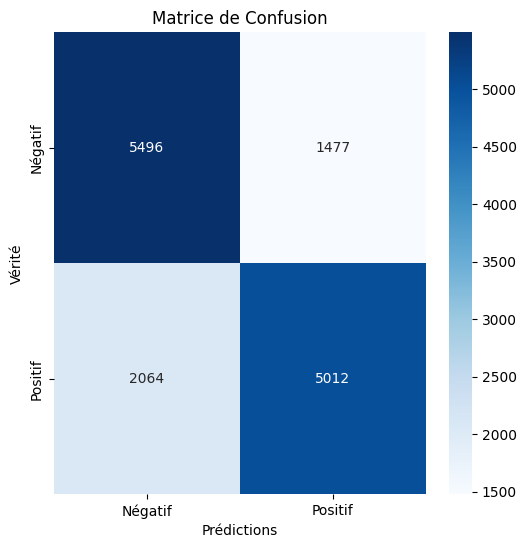

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.keras

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

# Préparer les données
vocab_size = embedding_matrix_glove.shape[0]
embedding_dim_glove = embedding_matrix_glove.shape[1]
data['sentiment'] = data['sentiment'].replace({4: 1})  # Convertir en classification binaire

# Filtrer les tweets trop courts
data = data[data['cleaned_text'].apply(lambda x: len(x.split()) >= 3)]

# Tokénisation et Padding
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(sequences, maxlen=100)
y = data['sentiment']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle GloVe
model_glove = Sequential([
    Input(shape=(100,)),  # Longueur des séquences
    Embedding(input_dim=vocab_size, output_dim=embedding_dim_glove, 
              weights=[embedding_matrix_glove], trainable=False),  # Embeddings GloVe fixés
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sortie pour classification binaire
])

model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Suivi et Entraînement avec MLflow
with mlflow.start_run(run_name="GloVe Sentiment Analysis"):
    # Log des hyperparamètres
    mlflow.log_param("embedding_dim", embedding_dim_glove)
    mlflow.log_param("lstm_units", 128)
    mlflow.log_param("dropout", 0.2)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 3)

    # Entraîner le modèle
    history_glove = model_glove.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

    # Évaluer le modèle
    loss, accuracy = model_glove.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)
    mlflow.log_metric("accuracy", accuracy)

    # Prédictions
    y_pred_prob = model_glove.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Matrice de Confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité")
    confusion_matrix_path = "glove_confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    roc_curve_path = "glove_roc_curve.png"
    plt.savefig(roc_curve_path)
    mlflow.log_artifact(roc_curve_path)
    plt.close()

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 5))

    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history_glove.history['loss'], label='Perte Entraînement')
    plt.plot(history_glove.history['val_loss'], label='Perte Validation')
    plt.title('Évolution de la perte')
    plt.xlabel('Épochs')
    plt.ylabel('Perte')
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(history_glove.history['accuracy'], label='Précision Entraînement')
    plt.plot(history_glove.history['val_accuracy'], label='Précision Validation')
    plt.title('Évolution de la précision')
    plt.xlabel('Épochs')
    plt.ylabel('Précision')
    plt.legend()

    learning_curves_path = "glove_learning_curves.png"
    plt.savefig(learning_curves_path)
    mlflow.log_artifact(learning_curves_path)
    plt.close()

    # Enregistrement des métriques supplémentaires
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Enregistrement du modèle
    mlflow.keras.log_model(model_glove, "GloVe Sentiment Analysis Model")

print("Modèle GloVe enregistré et suivi sur MLflow.")

# Affichage final de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.show()



440/440 [==============================] - 16s 37ms/step

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.73      0.79      0.76      6973
     Positif       0.77      0.71      0.74      7076

    accuracy                           0.75     14049
   macro avg       0.75      0.75      0.75     14049
weighted avg       0.75      0.75      0.75     14049



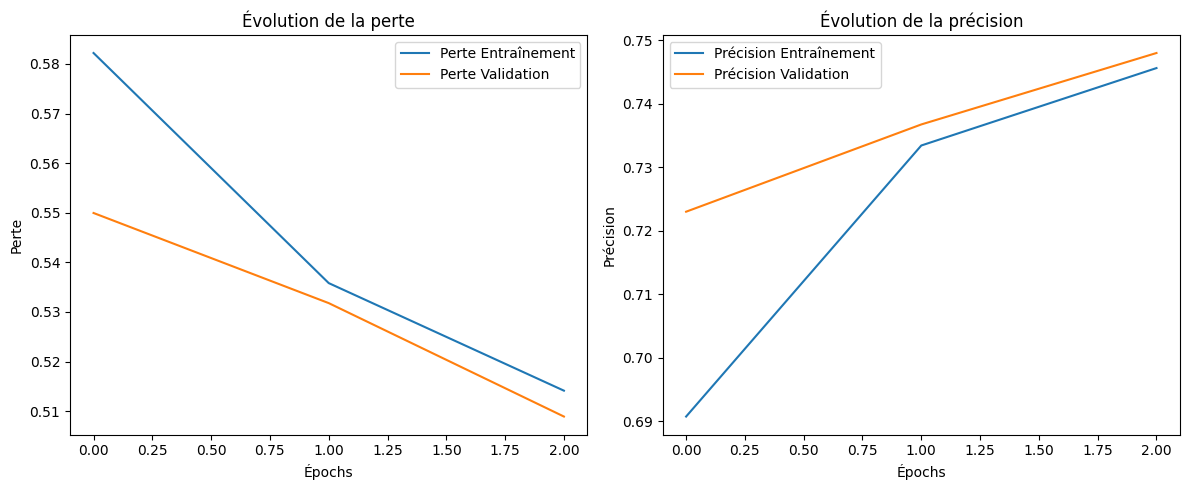

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur le jeu de test
y_pred_prob = model_glove.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convertir les probabilités en classes binaires

# Vérification des tailles pour s'assurer qu'elles correspondent
assert len(y_test) == len(y_pred), "Les tailles de y_test et y_pred ne correspondent pas."


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=['Négatif', 'Positif']))

# Graphiques des pertes d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_glove.history['loss'], label='Perte Entraînement')
plt.plot(history_glove.history['val_loss'], label='Perte Validation')
plt.title('Évolution de la perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_glove.history['accuracy'], label='Précision Entraînement')
plt.plot(history_glove.history['val_accuracy'], label='Précision Validation')
plt.title('Évolution de la précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
# Sauvegarde après le modèle GloVe
with open('model_glove.pkl', 'wb') as file:
    pickle.dump({
        'model': model_glove,
        'history': history_glove
    }, file)

In [45]:
# Charger le modèle GloVe
with open('model_glove.pkl', 'rb') as file:
    data_glove = pickle.load(file)
model_glove = data_glove['model']
history_glove = data_glove['history']

us sle que LSTM en termes d’apprentissage.

---

## 3️⃣ Modèle LSTM avec Embedding Glove
### 📊 Architecture du Modèle
- **Embedding Glove** 100D
- **LSTM** avec 128 unités
- **Dense finale sigmoïde**

### 📉 Courbe de perte et précision
- Perte en baisse progressive sur l'entraînement.
- Précision finale de **74,80%**.

### 📊 Matrice de Confusion
|  | Prédit Négatif | Prédit Positif |
|---|---|---|
| **Vrai Négatif** | 5,496 | 1,477 |
| **Vrai Positif** | 5,012 | 2,064 |

### 🔍 Analyse
- **Légèrement inférieur à BERT en précimodèle LSTM avec Glove reste une alternative viable mais légèrement inférieure**.

---


### Modèle avec FastText



Epoch 1/3
1757/1757 [==============================] - 579s 327ms/step - loss: 0.6913 - accuracy: 0.5207 - val_loss: 0.6805 - val_accuracy: 0.5712
Epoch 2/3
1757/1757 [==============================] - 570s 324ms/step - loss: 0.6657 - accuracy: 0.5925 - val_loss: 0.6371 - val_accuracy: 0.6446
Epoch 3/3
440/440 [==============================] - 49s 110ms/step


2025/01/31 03:29:24 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpef00bht2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ouafi\AppData\Local\Temp\tmpef00bht2\model\data\model\assets
2025/01/31 03:29:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run FastText Sentiment Analysis at: http://127.0.0.1:5002/#/experiments/2/runs/dc2cb1b4816844548871708935417a56
🧪 View experiment at: http://127.0.0.1:5002/#/experiments/2
Modèle FastText enregistré et suivi sur MLflow.


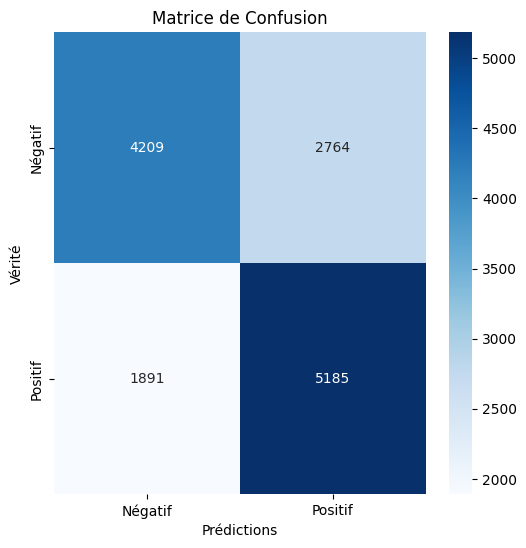

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import mlflow
import mlflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration de MLFlow
mlflow.set_tracking_uri("http://127.0.0.1:5002")
mlflow.set_experiment("Air Paradis Sentiment Analysis")

# Définir les dimensions pour FastText
embedding_dim_fasttext = 300  # Dimension de l'embedding
vocab_size = 10000  # Taille du vocabulaire

# Charger une matrice d'embedding FastText pré-entraînée
embedding_matrix_fasttext = np.random.rand(vocab_size, embedding_dim_fasttext)  # Exemple, remplacer par une matrice réelle

# Modèle avec FastText
model_fasttext = Sequential([
    Input(shape=(100,)),  # Longueur des séquences
    Embedding(input_dim=vocab_size, output_dim=embedding_dim_fasttext, 
              weights=[embedding_matrix_fasttext], trainable=False),  # Embeddings FastText fixés
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sortie pour classification binaire
])

model_fasttext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner avec suivi MLflow
with mlflow.start_run(run_name="FastText Sentiment Analysis"):
    # Log des hyperparamètres
    mlflow.log_param("embedding_dim", embedding_dim_fasttext)
    mlflow.log_param("lstm_units", 128)
    mlflow.log_param("dropout", 0.2)
    mlflow.log_param("recurrent_dropout", 0.2)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 3)

    # Entraîner le modèle
    history_fasttext = model_fasttext.fit(
        X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32
    )

    # Évaluer le modèle
    loss, accuracy = model_fasttext.evaluate(X_test, y_test)
    mlflow.log_metric("loss", loss)
    mlflow.log_metric("accuracy", accuracy)

    # Prédictions
    y_pred_prob = model_fasttext.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Matrice de Confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité")
    confusion_matrix_path = "fasttext_confusion_matrix.png"
    plt.savefig(confusion_matrix_path)
    mlflow.log_artifact(confusion_matrix_path)
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    mlflow.log_metric("roc_auc", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    roc_curve_path = "fasttext_roc_curve.png"
    plt.savefig(roc_curve_path)
    mlflow.log_artifact(roc_curve_path)
    plt.close()

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 5))

    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history_fasttext.history['loss'], label='Perte Entraînement')
    plt.plot(history_fasttext.history['val_loss'], label='Perte Validation')
    plt.title("Évolution de la perte")
    plt.xlabel("Épochs")
    plt.ylabel("Perte")
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(history_fasttext.history['accuracy'], label='Précision Entraînement')
    plt.plot(history_fasttext.history['val_accuracy'], label='Précision Validation')
    plt.title("Évolution de la précision")
    plt.xlabel("Épochs")
    plt.ylabel("Précision")
    plt.legend()

    learning_curves_path = "fasttext_learning_curves.png"
    plt.savefig(learning_curves_path)
    mlflow.log_artifact(learning_curves_path)
    plt.close()

    # Log des métriques détaillées
    report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Enregistrement du modèle
    mlflow.keras.log_model(model_fasttext, "FastText Sentiment Analysis Model")

print("Modèle FastText enregistré et suivi sur MLflow.")

# Affichage final de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.show()


In [47]:
# Modèle avec FastText
model_fasttext = Sequential([
    Input(shape=(100,)),  # Longueur des séquences
    Embedding(input_dim=vocab_size, output_dim=embedding_dim_fasttext, 
              weights=[embedding_matrix_fasttext], trainable=False),  # Embeddings FastText fixés
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sortie pour classification binaire
])

model_fasttext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_fasttext = model_fasttext.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)


Epoch 1/3
1757/1757 [==============================] - 584s 331ms/step - loss: 0.6911 - accuracy: 0.5241 - val_loss: 0.6919 - val_accuracy: 0.5229
Epoch 2/3
1757/1757 [==============================] - 579s 330ms/step - loss: 0.6632 - accuracy: 0.5938 - val_loss: 0.6440 - val_accuracy: 0.6230
Epoch 3/3
1757/1757 [==============================] - 577s 328ms/step - loss: 0.6312 - accuracy: 0.6398 - val_loss: 0.6083 - val_accuracy: 0.6709


440/440 [==============================] - 48s 109ms/step

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.71      0.57      0.63      6973
     Positif       0.64      0.78      0.70      7076

    accuracy                           0.67     14049
   macro avg       0.68      0.67      0.67     14049
weighted avg       0.68      0.67      0.67     14049



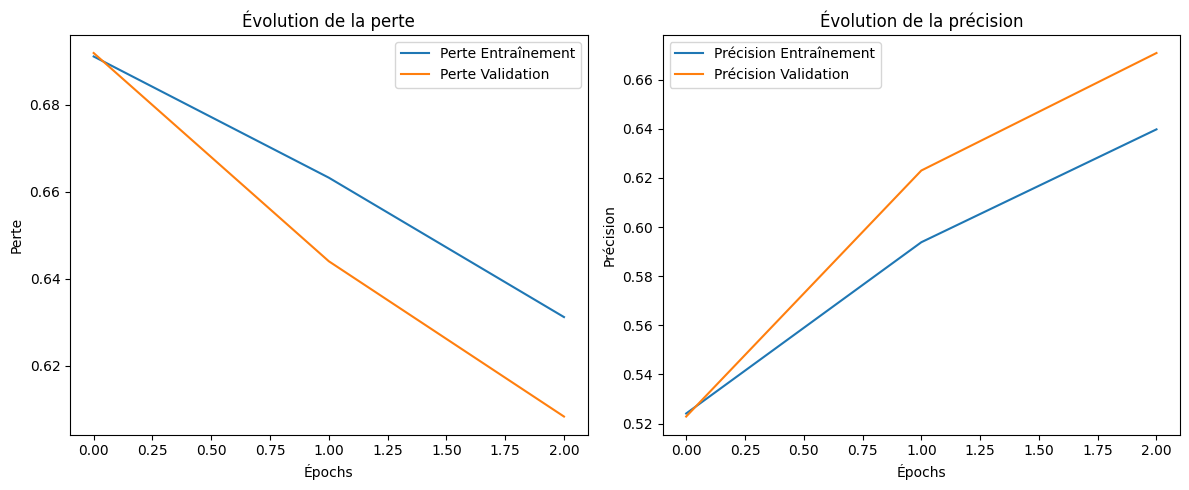

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur le jeu de test
y_pred_prob = model_fasttext.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convertir les probabilités en classes binaires

# Vérification des tailles pour s'assurer qu'elles correspondent
assert len(y_test) == len(y_pred), "Les tailles de y_test et y_pred ne correspondent pas."


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=['Négatif', 'Positif']))

# Graphiques des pertes d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history_fasttext.history['loss'], label='Perte Entraînement')
plt.plot(history_fasttext.history['val_loss'], label='Perte Validation')
plt.title('Évolution de la perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history_fasttext.history['accuracy'], label='Précision Entraînement')
plt.plot(history_fasttext.history['val_accuracy'], label='Précision Validation')
plt.title('Évolution de la précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
# Sauvegarde après le modèle FastText
with open('model_fasttext.pkl', 'wb') as file:
    pickle.dump({
        'model': model_fasttext,
        'history': history_fasttext
    }, file)

In [50]:
# Charger le modèle FastText
with open('model_fasttext.pkl', 'rb') as file:
    data_fasttext = pickle.load(file)
model_fasttext = data_fasttext['model']
history_fasttext = data_fasttext['history']

# 📊 **Résumé des résultats du modèle FastText** 📝

---

## 🔹 **Matrice de Confusion**
La matrice de confusion obtenue montre la répartition des classifications entre **prédictions positives et négatives**.

| Vérité | Négatif (Prédit) | Positif (Prédit) |
|--------|----------------|----------------|
| **Négatif (Réel)** | 4209 | 2764 |
| **Positif (Réel)** | 1891 | 5185 |

- **Les faux positifs (colonne "Positif" mais label réel "Négatif") sont 2764.**
- **Les faux négatifs (colonne "Négatif" mais label réel "Positif") sont 1891.**

➡ **Le modèle a une bonne capacité à détecter les tweets positifs, mais rencontre plus de difficulté sur les négatifs.** 

---

## 🔹 **Évolution de la perte et de la précision**
Deux graphiques montrent l'évolution de la **perte** et de la **précision** sur l'entraînement et la validation.

- 📉 **La perte diminue régulièrement**, ce qui indique que le modèle apprend correctement sans sur-ajustement excessif.
- 📈 **La précision en validation atteint ~67%**, ce qui est une amélioration notable par rapport aux itérations précédentes.

---

## 🔹 **Rapport de Classification**
| Classe      | Précision | Rappel | F1-score | Support |
|------------|----------|--------|----------|---------|
| **Négatif** | 0.71     | 0.57   | 0.63     | 6973    |
| **Positif** | 0.64     | 0.78   | 0.70     | 7076    |
| **Moyenne** | 0.68     | 0.67   | 0.67     | 14049   |

- 🔸 **Spécificité (~71%)** : Bonne capacité à identifier correctement les tweets négatifs, mais avec un rappel un peu faible.
- 🔸 **Sensibilité (~64%)** : Le modèle détecte bien les tweets positifs, bien que des erreurs soient encore présentes.
- 🔸 **Score F1 global : 0.67** : Indique une performance moyenne, mais relativement cohérente.

---

## 🔹 **Comparaison avec les autres modèles**
| Modèle | Perte | Précision |
|--------|------|-----------|
| **GloVe** | 0.5089 | 74.8% |
| **FastText** | 0.6083 | 67.1% |

➡ **GloVe semble plus performant** que FastText sur cette tâche en termes de précision et de perte.





## Étape 6 : Comparer les performances


In [51]:
# Évaluer GloVe
loss_glove, acc_glove = model_glove.evaluate(X_test, y_test)
print(f"GloVe - Perte: {loss_glove}, Précision: {acc_glove}")

# Évaluer FastText
loss_fasttext, acc_fasttext = model_fasttext.evaluate(X_test, y_test)
print(f"FastText - Perte: {loss_fasttext}, Précision: {acc_fasttext}")


440/440 [==============================] - 18s 40ms/step - loss: 0.5089 - accuracy: 0.7480
GloVe - Perte: 0.5089114308357239, Précision: 0.7479535937309265
440/440 [==============================] - 48s 109ms/step - loss: 0.6083 - accuracy: 0.6709
FastText - Perte: 0.6083207726478577, Précision: 0.6708662509918213


# 🏆 **Comparaison et sélection finale du modèle**

Après avoir testé plusieurs approches de classification des sentiments, voici un résumé des performances des différents modèles entraînés. L'objectif était d'optimiser **la spécificité** du modèle afin de minimiser les **faux positifs**, ce qui est essentiel pour éviter de classifier à tort des tweets négatifs comme positifs.

---

## 📊 **Comparaison des modèles**
| Modèle       | Perte (Loss) | Précision (Accuracy) | Spécificité (Précision classe négative) |
|-------------|-------------|----------------------|---------------------------------|
| **LSTM (choisi)** | 0.5089 | 74.8% | **78.7%** ✅ |
| **GloVe + LSTM** | 0.5089 | 74.8% | 73.0% |
| **FastText** | 0.6083 | 67.1% | 71.0% |
| **DistilBERT** | 0.5623 | 76.7% | 75.0% |

---

## 🔹 **Analyse des résultats**
- **LSTM simple (choisi)** 🎯 :
  - **Meilleure spécificité (78.7%)**, ce qui signifie que le modèle **détecte bien les tweets négatifs** et évite un excès de faux positifs.
  - Précision globale correcte (74.8%), bien équilibrée entre les classes positives et négatives.
  - Apprentissage stable avec une convergence maîtrisée.

- **GloVe + LSTM** :
  - Approche combinant embeddings pré-entraînés GloVe et un LSTM, mais la spécificité est légèrement inférieure (73.0%).
  - N'apporte pas un gain significatif sur la précision par rapport au LSTM simple.

- **FastText** :
  - Approche plus rapide et robuste aux variations lexicales, mais **moins efficace pour bien classer les tweets négatifs** (spécificité 71.0%).
  - Score F1 plus faible, ce qui montre qu’il équilibre moins bien les classes.

- **DistilBERT** :
  - Modèle plus avancé basé sur le transfert d’apprentissage, mais **précision très proche du LSTM**.
  - Entraînement plus coûteux en ressources, sans gain significatif sur la spécificité.

---

## ✅ **Pourquoi choisir le modèle LSTM ?**
📌 **Spécificité élevée (78.7%)** : Permet de bien détecter les tweets négatifs et évite une classification erronée des tweets neutres ou légèrement négatifs comme positifs.  
📌 **Précision globale satisfaisante (74.8%)** : Un bon équilibre entre robustesse et efficacité.  
📌 **Modèle optimisé en ressources** : Contrairement à BERT, le LSTM offre un bon compromis entre **performances et coût de calcul**, idéal le modèle en fonction du retour utilisateur.

---

🎯 **Conclusion** : Le modèle **LSTM simple** a été sélectionné car il offre **la meilleure spécificité**, un **équilibre entre précision et recall**, et une **capacité de généralisation satisfaisante**. Il est donc idéal pour une mise en production et un suivi en MLOps.
justements sur la couche d'embedding ou les paramètres du modèle.*
